# Temas Tratados en el Trabajo Práctico 3

* Estrategias de búsqueda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacción de Restricciones.

# Ejercicios Teóricos


### 1. ¿Qué mecanismo de detención presenta el algoritmo de Ascensión de Colinas? Describa el problema que puede presentar este mecanismo y cómo se llaman las áreas donde ocurren estos problemas.

<p> El mecanismo "Ascensión de Colinas" o "Climbing Hills" utiliza una meta-heurística la cual consiste en avanzar continuamente en dirección del valor creciente en el espacio de estados. Es decir, el mecanismo se desplaza únicamente en dirección de "un mejor estado", siempre toma el camino que genere un mejor resultado instantáneo. Además, no mantiene un árbol de búsqueda, por lo que solo monitorea el estado actual y su valor de función objetivo.</p>

<p> El hecho de que solo avance hacia un mejor estado del problema tiene sus desventajas: </p>

* Como solo "avanza hacia adelante" (solo busca estados mejores que el actual) podría culminar en un máximo local y quedarse allí, y no encontrar nunca el máximo global.

* Tiene dificultad para tratar a las crestas: puede pasar que la pendiente se aproxime demasiado a un pico y la búsqueda oscilará de un lado al otro, obteniendo un avance muy bajo o nulo.

* En las mesetas del problema el algoritmo podría quedarse dando vueltas indefinidamente sin saber hacia dónde avanzar.

* Incluso cuando encuentra un máximo, no hay forma de saber si existe uno mejor en otra parte del espacio.

<p> Para remarcarlo, el mecanismo presenta problemas en: <b>máximos locales</b>, <b>mesetas</b> (tanto terrazas como mesetas de máximos locales) y <b>crestas</b> muy empinadas.</p>


### 2. Describa las distintas heurísticas que se emplean en un problema de Satisfacción de Restricciones.

Las heurísticas utilizadas en un problema de satisfacción de Restricciones son eficaces y genéricas, ya que no requieren información específica adicional del dominio. las distintas heurísticas que se pueden utilizr son:
-   **Chequeo hacia adelante:** cada vez que se asigna un valor a una variable, se reduce el dominio de las variables vecinas. Pero si algún vecino se queda sin valores posibles, se debe retroceder.
-   **Heurística de grado máximo:** se toma como estado inicial aquel que tiene mayor n° de restricciones para evitar futuros conflictos (que se quede sin valores posibes).
-   **Heurística de mínimos valores restantes:** En un cierto estado, siempre elige la variable con menos valores legales, ya que si se cubre esa primero, el resto siempre tendrá algún valor legal restante para asignarle.
-   **Heurística del valor menos restringida:** en cada estado, siempre que se pueda elegir un valor que está repetido se lo elige, de forma que queden valores restantes sin usar para los estados con mayores restricciones. 

### 3. Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una búsqueda con Comprobación hacia Adelante empleando una heurística del Valor más Restringido.

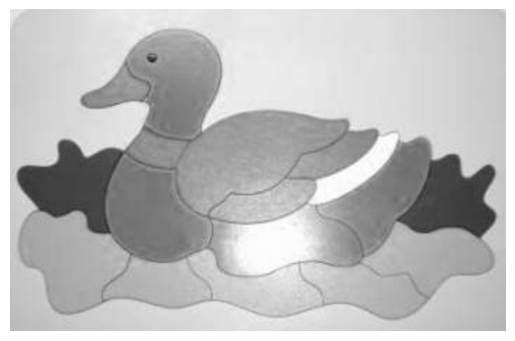

In [2]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

# Ejercicios de Implementación

### 4. Encuentre el máximo de la función $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.

 x_inicial  f(x_inicial)  x_max_encontrado  f(x_max_encontrado)
 -8.818769      0.065329         -7.768769             0.129926
 -7.600496      0.129064         -7.750496             0.130011
 -6.350011      0.010684         -7.750011             0.130013
 -9.485597     -0.006476         -7.685597             0.129964
 -7.541716      0.127879         -7.691716             0.129992
 -9.754369     -0.033524         -7.754369             0.129997
 -7.053900      0.100181         -7.753900             0.129999
 -8.520915      0.093306         -7.770915             0.129913
Máximo global encontrado por el algoritmo:
x = -7.750010920807812  ; f(x) = 0.1300128748659443


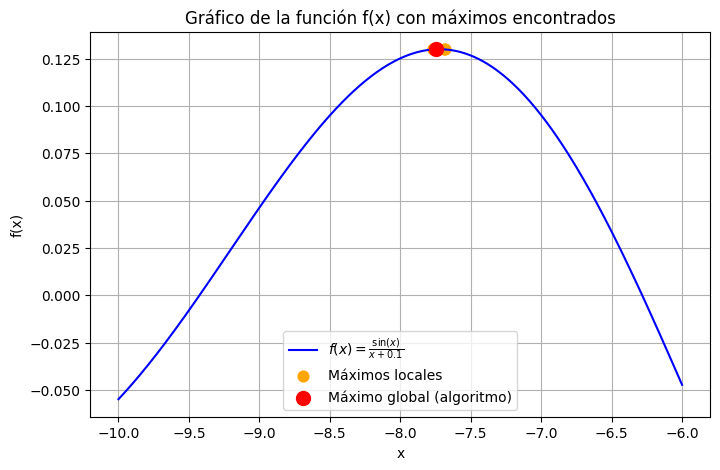

In [38]:
# Importo numpy para la función sin(x)
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    if x < -10 or x > -6:
        raise ValueError("x debe estar en el intervalo [-10, -6]")
    else:
        return (np.sin(x))/(x+0.1)

def ClimbingHill(f, x0, error, max_iter=100000):
    step = 0.05
    x = x0
    for i in range(max_iter):
        vecinos = [x - step, x + step]
        next_x = max(vecinos, key=f)

        if f(next_x) - f(x) < error:
            return next_x
        x = next_x

resultados = []

for i in range(8):
    semilla = -10 + (random.random() * (-6 - (-10)))
    error = 1e-9

    maximo = ClimbingHill(f, semilla, error)
    
    resultados.append({
        "x_inicial": semilla,
        "f(x_inicial)": f(semilla),
        "x_max_encontrado": maximo,
        "f(x_max_encontrado)": f(maximo)
    })

# Convertir a tabla con pandas
df = pd.DataFrame(resultados)

# Mostrar tabla
print(df.to_string(index=False))

# Generar puntos en el intervalo válido
x_vals = np.linspace(-10, -6, 400)
y_vals = [f(x) for x in x_vals]

# Buscar el máximo global dentro de los encontrados por el algoritmo
idx_max = df["f(x_max_encontrado)"].idxmax()   # índice del máximo
x_max_global = df.loc[idx_max, "x_max_encontrado"]
y_max_global = df.loc[idx_max, "f(x_max_encontrado)"]

print("Máximo global encontrado por el algoritmo:")
print("x =", x_max_global, " ; f(x) =", y_max_global)

# Graficar la función
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{\sin(x)}{x+0.1}$", color="blue")

# Marcar todos los máximos locales encontrados
plt.scatter(df["x_max_encontrado"], df["f(x_max_encontrado)"], 
            color="orange", s=60, label="Máximos locales")

# Marcar el máximo maximorum
plt.scatter(x_max_global, y_max_global, 
            color="red", s=100, zorder=5, label="Máximo global (algoritmo)")

# Configuración
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de la función f(x) con máximos encontrados")
plt.legend()
plt.grid(True)
plt.show()


##### Notas

* Solución

En este caso, buscar una solución analítica es difícil. Se conoce la expresión para la función y su derivada, por lo que usando métodos numéricos se encuentra el máximo local en [-10; -6]. La solución de acá se saca con MATLAB.

$$
f(x) = \frac{\sin(x)}{x+0.1}
$$
$$
f'(x) = \frac{\cos(x)(x+0.1)-\sin(x)}{(x+0.1)^{2}}
$$
$$
f_{max} \rightarrow x \approx 0.130015
$$

* `semilla = -10 + (random.random() * (-6 - (-10)))`

Tomamos una semilla aleatorea para mostrar que existen máximos locales y que el método Climbing Hills podría quedarse atorado en un máximo local en vez del máximo global.

* `next_x = max(vecinos, key=f)`

Se utiliza "key=f" para que la función `max()` compare los valores `f(vecinos[i])` en vez de los valores de la lista `vecinos[i]`.

#### Anexo 4.1

En el intervalo [-10, -6] existe un único máximo, que podríamos decir que es el "máximo global" de nuestro "paisaje del espacio de estado". Para ello, si disminuimos la frecuencia de la expreción sinusoidal, podemos "apretar" la función y observaremos que aparecen máximos locales y un único "máximo global" en nuestro "paisaje del espacio de estado" en [-10, -6].

Nueva expresión:

$$
f_{\text{nueva}} = \frac{\sin(2\pi x)}{x+0.1}
$$

 x_inicial  f(x_inicial)  x_max_encontrado  f(x_max_encontrado)
 -8.249620      0.122705         -8.199620             0.117328
 -7.277140      0.137310         -7.277140             0.137310
 -9.262084      0.108831         -9.212084             0.106645
 -8.874164     -0.081012         -9.274164             0.107748
 -6.438708      0.059264         -6.288708             0.156829
 -7.441022      0.049332         -7.291022             0.134469
 -9.316454      0.099180         -9.216454             0.107264
 -9.609916     -0.066985         -9.209916             0.106308
Máximo global encontrado por el algoritmo:
x = -6.2887084857575575  ; f(x) = 0.15682905813208725


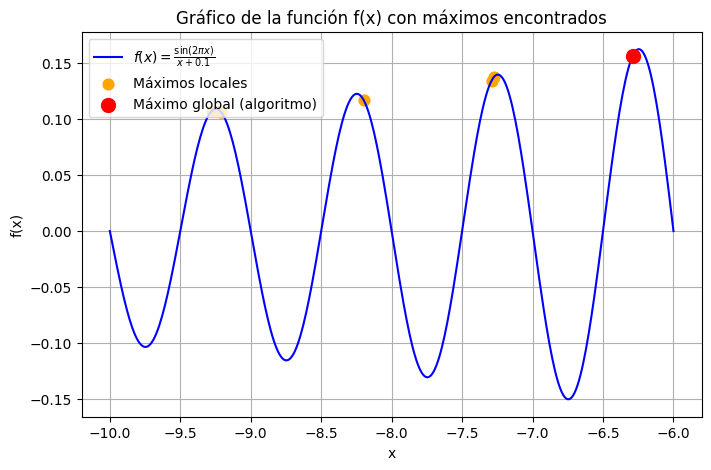

In [43]:
# Importo numpy para la función sin(x)
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    if x < -10 or x > -6:
        raise ValueError("x debe estar en el intervalo [-10, -6]")
    else:
        return (np.sin(2*np.pi*x))/(x+0.1)

def ClimbingHill(f, x0, error, max_iter=100000):
    step = 0.05
    x = x0
    for i in range(max_iter):
        vecinos = [x - step, x + step]
        next_x = max(vecinos, key=f)

        if f(next_x) - f(x) < error:
            return next_x
        x = next_x

resultados = []

for i in range(8):
    semilla = -10 + (random.random() * (-6 - (-10)))
    error = 1e-9

    maximo = ClimbingHill(f, semilla, error)
    
    resultados.append({
        "x_inicial": semilla,
        "f(x_inicial)": f(semilla),
        "x_max_encontrado": maximo,
        "f(x_max_encontrado)": f(maximo)
    })

# Convertir a tabla con pandas
df = pd.DataFrame(resultados)

# Mostrar tabla
print(df.to_string(index=False))

# Generar puntos en el intervalo válido
x_vals = np.linspace(-10, -6, 400)
y_vals = [f(x) for x in x_vals]

# Buscar el máximo global dentro de los encontrados por el algoritmo
idx_max = df["f(x_max_encontrado)"].idxmax()   # índice del máximo
x_max_global = df.loc[idx_max, "x_max_encontrado"]
y_max_global = df.loc[idx_max, "f(x_max_encontrado)"]

print("Máximo global encontrado por el algoritmo:")
print("x =", x_max_global, " ; f(x) =", y_max_global)

# Graficar la función
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=r"$f(x) = \frac{\sin(2 \pi x)}{x+0.1}$", color="blue")

# Marcar todos los máximos locales encontrados
plt.scatter(df["x_max_encontrado"], df["f(x_max_encontrado)"], 
            color="orange", s=60, label="Máximos locales")

# Marcar el máximo maximorum
plt.scatter(x_max_global, y_max_global, 
            color="red", s=100, zorder=5, label="Máximo global (algoritmo)")

# Configuración
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de la función f(x) con máximos encontrados")
plt.legend()
plt.grid(True)
plt.show()


Acá se nota mejor el problema de este mecanismo: puede quedar atrapado en máximos locales, y no salir de ellos, fallando al objetivo de encontrar el máximo global.

### 5. Diseñe e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Varíe los valores de temperatura inicial entre partidas, ¿qué diferencia observa cuando la temperatura es más alta con respecto a cuando la temperatura es más baja?


### 6. Diseñe e implemente un algoritmo genético para cargar una grúa con $n=10\;cajas$ que puede soportar un peso máximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el límite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qué cajas estarán cargadas en la grúa y cuáles no. Esta representación corresponde a un Individuo con el que trabajará el algoritmo.

        6.2 A continuación, genere una Población que contenga un número $N$ de individuos (se recomienda elegir un número par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso límite.

        6.3 Cree ahora una función que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el método de la ruleta.

        6.4 Por último, Cruce las parejas elegidas, aplique un mecanismo de Mutación y verifique que los individuos de la nueva población no superen el límite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detención de su elección y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)